<a href="https://colab.research.google.com/github/AlejandraMatajira/Mi-repositorio-/blob/main/Cancer_de_mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_name = '/content/drive/MyDrive/Analitica De datos/base_de_datos_enfermedad_proyecto.csv'
df = pd.read_csv(file_name)
df

Mounted at /content/drive


,Edad,Género,Síntoma_1,Síntoma_2,Síntoma_3,Nivel_Azúcar,Presión_Arterial,Colesterol,Frecuencia_Cardiaca,Resultado_Prueba,...,Antecedentes_Familiares,Antecedentes_Cardiacos,Antecedentes_Diabetes,Antecedentes_Respiratorios,Alergias,Tabaquismo,Consumo_Alcohol,Ejercicio_Regular,Peso,Altura
0,32,Masculino,Dolor de garganta,Fatiga,Dolor muscular,88.14,99.22,142,97,Negativo,...,Sí,Sí,Sí,Sí,Sí,Sí,No,Sí,78.69,1.61
1,18,Masculino,Tos,Dificultad para respirar,Congestión nasal,90.21,176.15,206,66,Positivo,...,Sí,No,No,No,Sí,No,Sí,No,50.91,1.62
2,64,Masculino,Dolor de cabeza,Dolor abdominal,Dolor muscular,170.50,178.67,179,66,Negativo,...,No,No,Sí,No,No,Sí,No,Sí,90.68,1.57
3,49,Masculino,Tos,Náuseas,Congestión nasal,198.64,147.60,176,80,Positivo,...,Sí,No,No,No,Sí,Sí,No,Sí,94.16,1.66
4,76,Masculino,Dolor de garganta,Fatiga,Dolor muscular,166.85,138.51,229,97,Negativo,...,Sí,Sí,No,Sí,Sí,Sí,Sí,Sí,104.41,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,81,Masculino,Fiebre,Dificultad para respirar,Congestión nasal,125.69,120.17,170,92,Negativo,...,No,Sí,Sí,No,No,No,Sí,No,108.16,1.55
996,89,Masculino,Dolor de garganta,Náuseas,Dolor muscular,95.72,129.05,188,64,Positivo,...,No,Sí,No,No,No,No,Sí,Sí,74.31,1.61
997,59,Masculino,Dolor de cabeza,Fatiga,Dolor en el pecho,139.37,113.57,229,63,Negativo,...,No,Sí,No,Sí,No,No,No,Sí,79.28,1.66
998,66,Masculino,Tos,Dificultad para respirar,Dolor en el pecho,103.33,127.27,239,68,Negativo,...,No,Sí,No,No,Sí,No,Sí,Sí,56.19,1.69


##**LIMPIEZA DE DATOS**

In [ ]:
síntomas_únicos = set(df["Síntoma_1"])

# Cuenta el número de síntomas únicos
síntomas_únicos = list(síntomas_únicos)

mapeo_sintomas = {
    'Fiebre': 1,
    'Dolor de garganta': 2,
    'Tos': 3,
    'Dolor de cabeza': 4
}

# Aplicar el mapeo a la columna 'Síntoma_1'
df['Síntoma_1'] = df['Síntoma_1'].map(mapeo_sintomas)

# Visualizar los primeros registros para ver el resultado
print(df['Síntoma_1'])

síntomas_únicos2 = set(df["Síntoma_2"])

# Cuenta el número de síntomas únicos
síntomas_únicos2 = list(síntomas_únicos2)

# Imprime el número de síntomas únicos

mapeo_sintomas2 = {
    'Dificultad para respirar': 1,
    'Náuseas': 2,
    'Dolor abdominal': 3,
    'Fatiga': 4
}

# Aplicar el mapeo a la columna 'Síntoma_1'
df['Síntoma_2'] = df['Síntoma_2'].map(mapeo_sintomas2)

# Visualizar los primeros registros para ver el resultado
print(df['Síntoma_2'])

síntomas_únicos3 = set(df["Síntoma_3"])

# Cuenta el número de síntomas únicos
síntomas_únicos3 = list(síntomas_únicos3)

# Imprime el número de síntomas únicos

mapeo_sintomas3 = {
    'Dolor en el pecho': 1,
    'Dolor muscular': 2,
    'Escalofríos': 3,
    'Congestión nasal': 4
}

# Aplicar el mapeo a la columna 'Síntoma_1'
df['Síntoma_3'] = df['Síntoma_3'].map(mapeo_sintomas3)

# Visualizar los primeros registros para ver el resultado
print(df['Síntoma_3'])

Genero = set(df["Género"])

# Cuenta el número de síntomas únicos
Generos = list(Genero)

mapeo_genero = {
    'Masculino': 0,
    'Femenino': 1
}

# Aplicar el mapeo a la columna 'Síntoma_1'
df['Género'] = df['Género'].map(mapeo_genero)

# Visualizar los primeros registros para ver el resultado
print(df['Género'])

prueba = set(df["Resultado_Prueba"])

# Cuenta el número de síntomas únicos

mapeo_prueba = {
    'Positivo': 1,
    'Negativo': 0
}

# Aplicar el mapeo a la columna 'Síntoma_1'
df['Resultado_Prueba'] = df['Resultado_Prueba'].map(mapeo_prueba)

# Visualizar los primeros registros para ver el resultado
print(df['Resultado_Prueba'])

0      2
1      3
2      4
3      3
4      2
      ..
995    1
996    2
997    4
998    3
999    4
Name: Síntoma_1, Length: 1000, dtype: int64
0      4
1      1
2      3
3      2
4      4
      ..
995    1
996    2
997    4
998    1
999    1
Name: Síntoma_2, Length: 1000, dtype: int64
0      2
1      4
2      2
3      4
4      2
      ..
995    4
996    2
997    1
998    1
999    4
Name: Síntoma_3, Length: 1000, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Género, Length: 1000, dtype: int64
0      0
1      1
2      0
3      1
4      0
      ..
995    0
996    1
997    0
998    0
999    0
Name: Resultado_Prueba, Length: 1000, dtype: int64


In [ ]:
df['Antecedentes_Familiares'] = df['Antecedentes_Familiares'].replace({'Sí': 1, 'No': 0})
df['Antecedentes_Cardiacos'] = df['Antecedentes_Cardiacos'].replace({'Sí': 1, 'No': 0})
df['Antecedentes_Diabetes'] = df['Antecedentes_Diabetes'].replace({'Sí': 1, 'No': 0})
df['Antecedentes_Respiratorios'] = df['Antecedentes_Respiratorios'].replace({'Sí': 1, 'No': 0})
df['Alergias'] = df['Alergias'].replace({'Sí': 1, 'No': 0})
df['Tabaquismo'] = df['Tabaquismo'].replace({'Sí': 1, 'No': 0})
df['Consumo_Alcohol'] = df['Consumo_Alcohol'].replace({'Sí': 1, 'No': 0})
df['Ejercicio_Regular'] = df['Ejercicio_Regular'].replace({'Sí': 1, 'No': 0})

In [ ]:
df['Tratamiento'] = df['Tratamiento'].replace({'Sí': 1, 'No': 0})

In [ ]:
df = df.rename(columns={'Género': 'Genero', 'Síntoma_1': 'Sintoma_1', 'Síntoma_2': 'Sintoma_2', 'Síntoma_3': 'Sintoma_3','Nivel_Azúcar': 'Nivel_Azucar', 'Presión_Arterial': 'Presion_Arterial'})
df

,Edad,Genero,Sintoma_1,Sintoma_2,Sintoma_3,Nivel_Azucar,Presion_Arterial,Colesterol,Frecuencia_Cardiaca,Resultado_Prueba,...,Antecedentes_Familiares,Antecedentes_Cardiacos,Antecedentes_Diabetes,Antecedentes_Respiratorios,Alergias,Tabaquismo,Consumo_Alcohol,Ejercicio_Regular,Peso,Altura
0,32,0,2,4,2,88.14,99.22,142,97,0,...,1,1,1,1,1,1,0,1,78.69,1.61
1,18,0,3,1,4,90.21,176.15,206,66,1,...,1,0,0,0,1,0,1,0,50.91,1.62
2,64,0,4,3,2,170.50,178.67,179,66,0,...,0,0,1,0,0,1,0,1,90.68,1.57
3,49,0,3,2,4,198.64,147.60,176,80,1,...,1,0,0,0,1,1,0,1,94.16,1.66
4,76,0,2,4,2,166.85,138.51,229,97,0,...,1,1,0,1,1,1,1,1,104.41,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,81,0,1,1,4,125.69,120.17,170,92,0,...,0,1,1,0,0,0,1,0,108.16,1.55
996,89,0,2,2,2,95.72,129.05,188,64,1,...,0,1,0,0,0,0,1,1,74.31,1.61
997,59,0,4,4,1,139.37,113.57,229,63,0,...,0,1,0,1,0,0,0,1,79.28,1.66
998,66,0,3,1,1,103.33,127.27,239,68,0,...,0,1,0,0,1,0,1,1,56.19,1.69


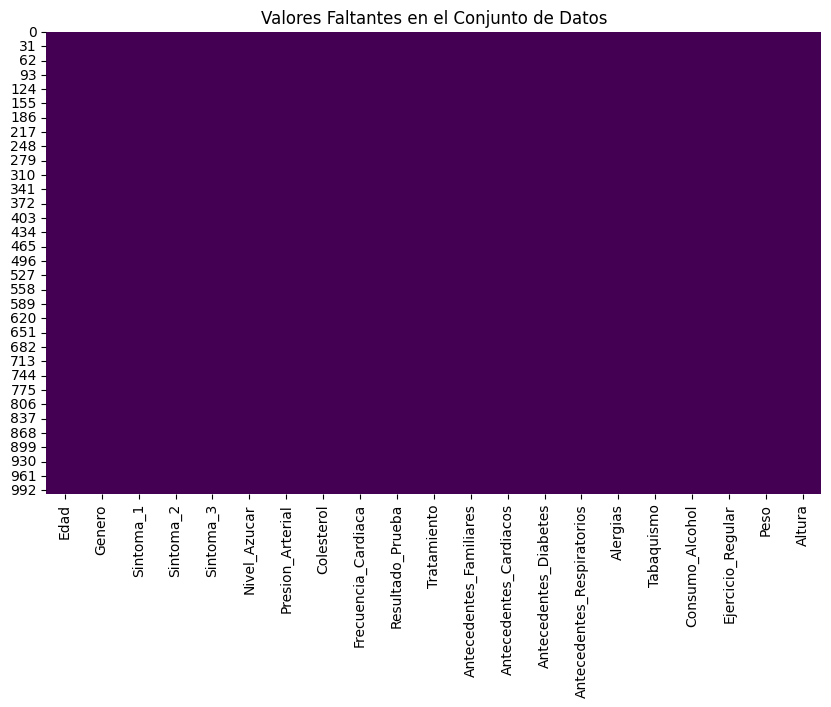

In [ ]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  # 'viridis' es un esquema de colores, puedes cambiarlo según tu preferencia
plt.title('Valores Faltantes en el Conjunto de Datos')
plt.show()

In [ ]:
semilla = 3134072126
muestra_aleatoria = df.sample(n=750, random_state=semilla)
#muestra_aleatoria.to_csv('muestra1_base_de_datos_enfermedad_proyecto.csv', index=False)

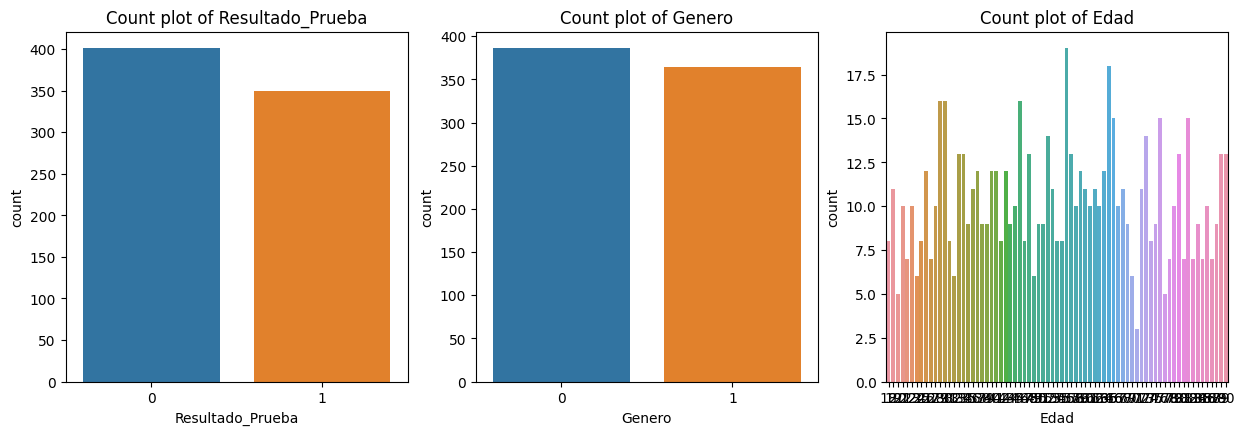

In [ ]:
muestra_aleatoria['Nivel_Azucar'] = muestra_aleatoria['Nivel_Azucar'].round().astype(int)
muestra_aleatoria['Presion_Arterial'] = muestra_aleatoria['Presion_Arterial'].round().astype(int)
muestra_aleatoria['Colesterol'] = muestra_aleatoria["Colesterol"].round().astype(int)
muestra_aleatoria["Peso"] = muestra_aleatoria["Peso"].round().astype(int)
var_to_look =["Resultado_Prueba","Genero","Edad"]
plt.figure(figsize=(15,10))
for i, var in enumerate(var_to_look):
  plt.subplot(2,3,i+1)
  if i ==3:
    plt.xticks(rotation=90)
  sns.countplot(data=muestra_aleatoria, x=var)
  plt.title("Count plot of " + var)
plt.show()

##ANÁLISIS DESCRIPTIVO DE LOS DATOS

In [ ]:
summary = muestra_aleatoria.describe()

# Muestra el resumen
summary

,Edad,Genero,Sintoma_1,Sintoma_2,Sintoma_3,Nivel_Azucar,Presion_Arterial,Colesterol,Frecuencia_Cardiaca,Resultado_Prueba,...,Antecedentes_Cardiacos,Antecedentes_Diabetes,Antecedentes_Respiratorios,Alergias,Tabaquismo,Consumo_Alcohol,Ejercicio_Regular,Peso,Altura,IMC
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,54.188000,0.485333,2.565333,2.474667,2.525333,135.331893,135.679213,183.926667,79.881333,0.465333,...,0.496000,0.498667,0.525333,0.537333,0.510667,0.490667,0.504000,81.984253,1.699427,28.831495
std,20.469473,0.500118,1.106057,1.130367,1.119686,38.193590,25.773782,38.058506,11.899133,0.499130,...,0.500318,0.500332,0.499691,0.498937,0.500220,0.500246,0.500318,21.259173,0.116477,8.620571
min,18.000000,0.000000,1.000000,1.000000,1.000000,70.640000,90.340000,120.000000,60.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.060000,1.500000,13.117332
25%,37.000000,0.000000,2.000000,1.000000,2.000000,101.070000,114.127500,150.000000,69.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.290000,1.600000,21.556463
50%,55.000000,0.000000,3.000000,2.000000,3.000000,138.990000,135.615000,183.000000,80.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,81.960000,1.700000,28.496309
75%,72.000000,1.000000,4.000000,3.000000,4.000000,168.845000,158.257500,217.000000,90.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.962500,1.800000,35.207091
max,90.000000,1.000000,4.000000,4.000000,4.000000,199.900000,179.820000,250.000000,100.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,120.000000,1.900000,52.537169


#PRUEBA DE HIPOTESIS E INTERVALOS DE CONFIANZA:

In [ ]:
#for i in muestra_aleatoria:
 #print(i)
import statsmodels.api as sm
grupo_a = muestra_aleatoria[muestra_aleatoria['Tratamiento'] == 1]["Sintoma_2"]
grupo_b = muestra_aleatoria[muestra_aleatoria["Tratamiento"] == 0]["Sintoma_2"]
#for i in muestra_aleatoria:
 #print(i)
 #grupo_a = muestra_aleatoria[muestra_aleatoria['Antecedentes_Familiares'] == 1][i]
 #grupo_b = muestra_aleatoria[muestra_aleatoria["Antecedentes_Familiares"] == 0][i]
 #grupo_a = muestra_aleatoria[muestra_aleatoria['Genero'] == 1][i]
 #grupo_b = muestra_aleatoria[muestra_aleatoria['Genero'] == 0][i]
 #grupo_a = muestra_aleatoria[muestra_aleatoria['Tabaquismo'] == 1][i]
 #grupo_b = muestra_aleatoria[muestra_aleatoria["Tabaquismo"] == 0][i]
 #grupo_a = muestra_aleatoria[muestra_aleatoria['Ejercicio_Regular'] == 1][i]
 #grupo_b = muestra_aleatoria[muestra_aleatoria["Ejercicio_Regular"] == 0][i]
 #grupo_a = muestra_aleatoria[muestra_aleatoria['Tratamiento'] == 1]["Presion_Arterial"]
 #grupo_b = muestra_aleatoria[muestra_aleatoria["Tratamiento"] == 0]["Presion_Arterial"]
 #grupo_a = muestra_aleatoria[muestra_aleatoria['Resultado_Prueba'] == 1][i]
 #grupo_b = muestra_aleatoria[muestra_aleatoria["Resultado_Prueba"] == 0][i]
 #t_statistic, p_value = stats.ttest_ind(grupo_a, grupo_b)

 # Imprime los resultados
 #print("Estadística t:", t_statistic)
 #print("Valor p:", p_value)
t_statistic, p_value = stats.ttest_ind(grupo_a, grupo_b)
confidence_level = 0.95
ci = stats.t.interval(confidence_level, loc=grupo_a.mean() - grupo_b.mean(),
                     scale=((grupo_a.var() / len(grupo_a)) + (grupo_b.var() / len(grupo_b)))**0.5,
                     df=min(len(grupo_a), len(grupo_b)) - 1)

print("Intervalo de confianza para la diferencia de medias:", ci)
print("Estadística t:", t_statistic)
print("Valor p:", p_value)

#REGRESIÓN LINEAL SIMPLE Y MULTIPLE:

In [ ]:
corr_mat = data[['Edad', 'Resultado_Prueba', 'Genero', 'Nivel_Azucar', 'Presion_Arterial', 'Colesterol', 'Frecuencia_Cardiaca', 'Peso', 'Altura']].corr()
sns.heatmap(corr_mat, cmap = sns.diverging_palette(220, 10, as_cmap = True), annot = True)
plt.title('Matriz de Correlación')

In [ ]:
import statsmodels.api as sm
import pandas as pd
X = data[["Edad",	"Genero", "Sintoma_1",	"Sintoma_2"	,"Sintoma_3",	"Nivel_Azucar",	"Presion_Arterial",	"Colesterol","Frecuencia_Cardiaca","Antecedentes_Familiares", "Antecedentes_Cardiacos",
          "Antecedentes_Diabetes", "Antecedentes_Respiratorios","Tabaquismo", "Consumo_Alcohol", "Ejercicio_Regular",	"Peso",	"Altura"]]

# Agregar una constante (intercepto) al modelo
X = sm.add_constant(X)

# Variable dependiente
y = data['Resultado_Prueba']

# Ajustar el modelo OLS
model = sm.OLS(y, X).fit()

# Acceder a los resultados
results = model.summary()

# Imprimir los resultados
print(results)

#REGRESIÓN LOGISTICA:

In [ ]:
x1 = muestra_aleatoria['Edad']
y = muestra_aleatoria['Resultado_Prueba']
x=sm.add_constant(x1)
reg_log=sm.Logit(y,x)
results_log=reg_log.fit()
results_log.summary()
print(results_log.summary())

In [ ]:
np.exp(-0.0016)*100

In [ ]:
# Definir la variable dependiente (y) y la variable independiente (x)
y = muestra_aleatoria['Resultado_Prueba']
x1 = muestra_aleatoria['Antecedentes_Familiares']

# Agregar una constante a la variable independiente (intercepto)
x = sm.add_constant(x1)

# Ajustar el modelo de regresión logística
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()

# Imprimir el resumen del modelo
print(results_log.summary())

In [ ]:
np.exp(0.0167)*100

In [ ]:
y = muestra_aleatoria['Resultado_Prueba']
x1 = muestra_aleatoria[['Antecedentes_Familiares', 'Peso']]

# Agregar una columna de unos a la matriz de variables independientes
x = sm.add_constant(x1)

# Ajustar el modelo de regresión logística
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()

# Imprimir un resumen del modelo
print(results_log.summary())

In [ ]:
np.exp(0.0030)*100

#METRICAS DE DESEMPEÑO

In [ ]:
import statsmodels.api as sm
#view AIC of model
print(results_log.aic)
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

In [ ]:
# Create an array (so it is easier to calculate the accuracy)
cm = np.array(cm_df)
# Calculate the accuracy of the model
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

In [ ]:
# Precision
cm = np.array(cm_df)
Presicion=cm[0,0]/(cm[0,0]+cm[1,0])
Presicion

In [ ]:
cm=np.array(cm_df)
Recall=(cm[0,0]/(cm[0,0]+cm[0,1]))
Recall


In [ ]:
cm=np.array(cm_df)
Especifidad=(cm[0,0]/(cm[0,0]+cm[0,1]))
Especifidad


In [ ]:
cm=np.array(cm_df)
uno_menos_Especifidad=(cm[0,1]/(cm[0,1]+cm[0,0]))
uno_menos_Especifidad

In [ ]:
f1_score=2*(Presicion*Recall)/(Presicion+Recall)
f1_score


In [ ]:
#VPP
cm=np.array(cm_df)
VPP=(cm[1,1]/(cm[1,1]+cm[0,1]))
VPP

In [ ]:
cm=np.array(cm_df)
VPN=(cm[0,0]/(cm[0,0]+cm[1,0]))
VPN

In [ ]:
#define the predictor variables and the response variable
Y = muestra_aleatoria[['Resultado_Prueba']]
X = muestra_aleatoria[['Antecedentes_Familiares', 'Edad']]
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=0)
#instantiate the model
log_regression = LogisticRegression()
#fit the model using the training data
log_regression.fit(X_train,Y_train)

In [ ]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#**Preguntas: **


##¿Cuales son las caracteristicas demograficas mas comunes de los pacientes que tienen un alto riesgo de complicaciones medicas?

**###1. Identifica los Pacientes en Riesgo de Complicaciones Médicas:**

Primero, para definir qué significa "alto riesgo de complicaciones médicas". Se Tomará cómo peligroso los siguientes parámetros:

Nivel de azucar >= 200 mg/dl  
Presión arterial >= 130 mmHg         
Colesterol >= 200 mg/dl                     
Frecuencia cardiaca =< 60 o >=100 lmp          
Si tiene algun antecedente.                                             
Si fuma                                       
Si consume alcohol.
IMC es >= 30 kg/m2





In [ ]:
muestra_aleatoria["IMC"] = muestra_aleatoria["Peso"] / (muestra_aleatoria["Altura"]**2)

In [ ]:

def evaluar_riesgo(fila):
    if (
        fila['Nivel_Azucar'] >= 200 or
        fila['Presion_Arterial'] >= 130 or
        fila['Colesterol'] >= 200 or
        fila['Frecuencia_Cardiaca'] <= 60 or fila['Frecuencia_Cardiaca'] >= 100 or
        fila['Antecedentes_Cardiacos'] == 1 or
        fila['Antecedentes_Diabetes'] == 1 or
        fila['Antecedentes_Respiratorios'] == 1 or
        fila['Tabaquismo'] == 1 or
        fila['Consumo_Alcohol'] == 1 or
        fila['IMC'] >= 30
    ):
        return 1
    else:
        return 0

# Aplica la función para crear una nueva columna 'Riesgo' en el DataFrame
muestra_aleatoria['Riesgo'] = muestra_aleatoria.apply(evaluar_riesgo, axis=1)
pacientes_alto_riesgo = muestra_aleatoria[muestra_aleatoria['Riesgo'] == 1]
pacientes_bajo_riesgo = muestra_aleatoria[muestra_aleatoria['Riesgo'] == 0]



     Edad  Genero  Sintoma_1  Sintoma_2  Sintoma_3  Nivel_Azucar  \
106    75       1          1          1          1        126.14   
519    72       1          2          2          4        142.94   
570    84       0          1          1          3        172.25   
561    66       0          4          3          4        105.89   
493    19       0          2          1          4        180.19   
..    ...     ...        ...        ...        ...           ...   
271    82       0          3          4          4         76.90   
297    52       1          2          2          1        198.38   
960    43       1          4          1          2        106.67   
333    49       0          3          4          2        174.23   
989    23       0          3          2          3        104.10   

     Presion_Arterial  Colesterol  Frecuencia_Cardiaca  Resultado_Prueba  ...  \
106            151.17         217                   65                 0  ...   
519            147.74

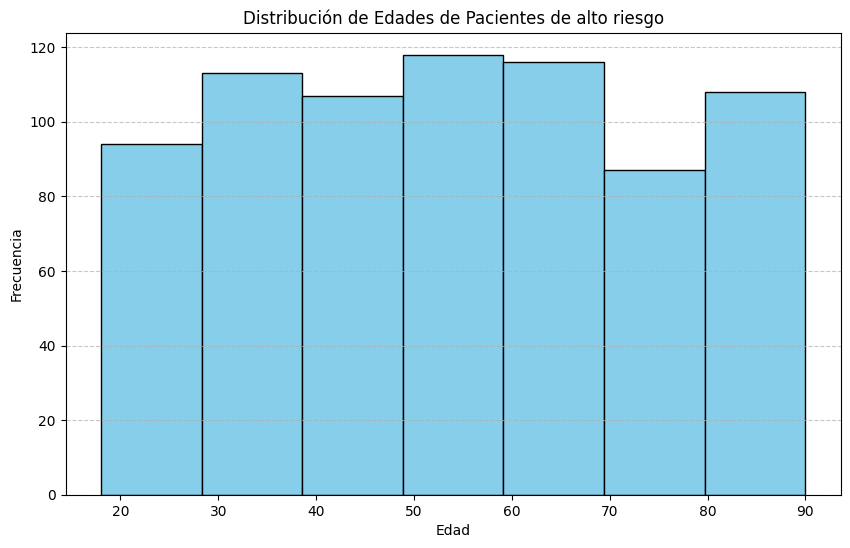

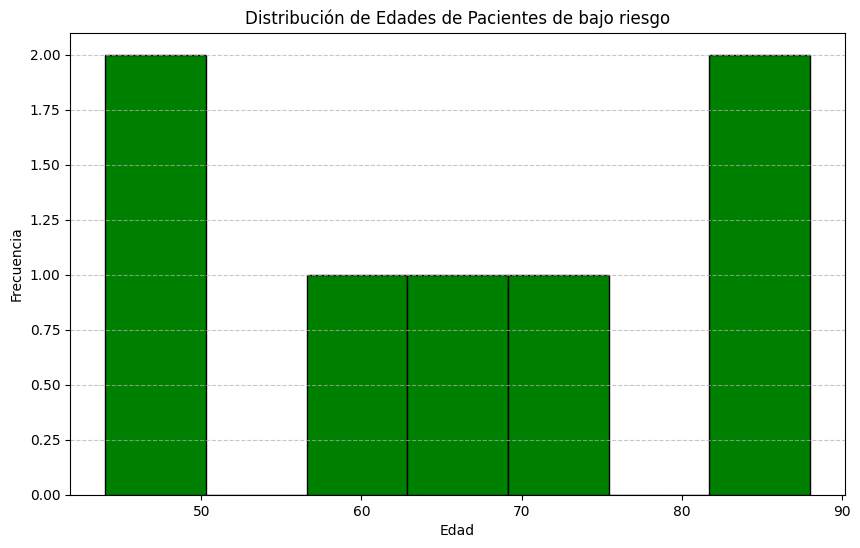

In [ ]:
# Distribución de edades por género

plt.figure(figsize=(10, 6))
plt.hist(pacientes_alto_riesgo["Edad"], bins=7, color='skyblue', edgecolor='black')  # Ajusta el número de bins según tu preferencia
plt.title('Distribución de Edades de Pacientes de alto riesgo')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


plt.figure(figsize=(10, 6))
plt.hist(pacientes_bajo_riesgo["Edad"], bins=7, color='green', edgecolor='black')  # Ajusta el número de bins según tu preferencia
plt.title('Distribución de Edades de Pacientes de bajo riesgo')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Esto indica que no depende de la edad sino de otras variables


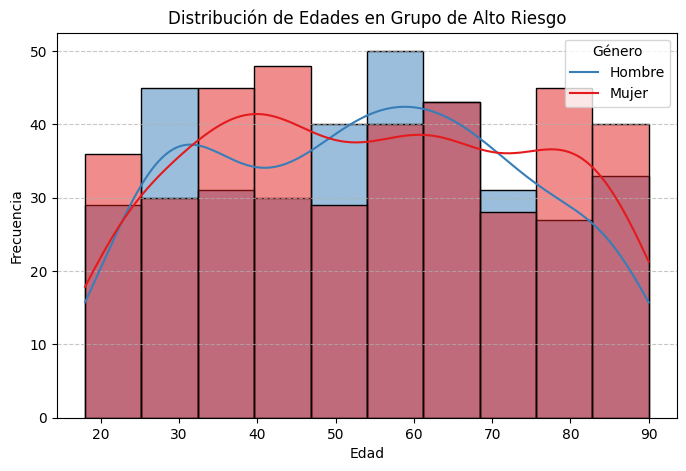

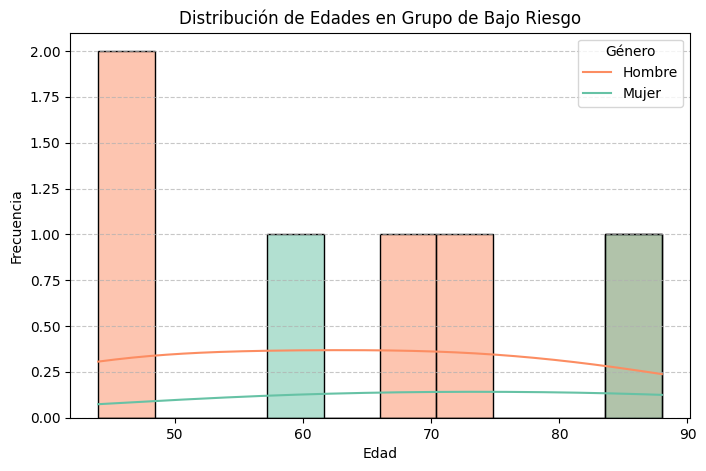

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=pacientes_alto_riesgo, x='Edad', hue='Genero', bins=10, kde=True, palette='Set1')
plt.title('Distribución de Edades en Grupo de Alto Riesgo')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Género', labels=['Hombre', 'Mujer'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(data=pacientes_bajo_riesgo, x='Edad', hue='Genero', bins=10, kde=True, palette='Set2')
plt.title('Distribución de Edades en Grupo de Bajo Riesgo')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Género', labels=['Hombre', 'Mujer'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

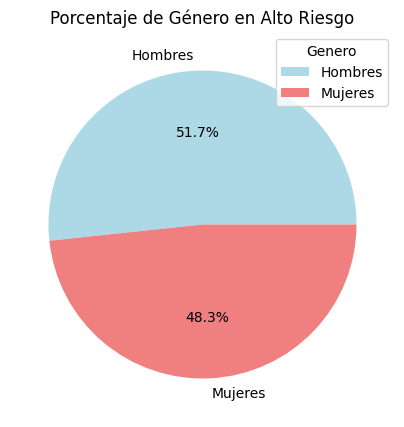

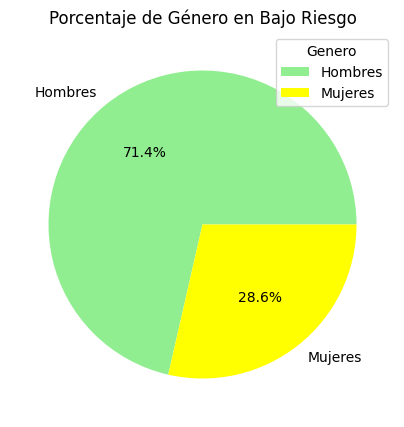

In [ ]:
frecuencia_genero = muestra_aleatoria.groupby(['Riesgo', 'Genero']).size().unstack()
#ALTO RIESGO
frecuencia_genero_alto_riesgo = pacientes_alto_riesgo['Genero'].value_counts()

colores = ['lightblue', 'lightcoral']
etiquetas = ['Hombres', 'Mujeres']
plt.figure(figsize=(5, 5))
plt.pie(frecuencia_genero_alto_riesgo, labels=etiquetas, autopct='%1.1f%%', colors=colores)
plt.title('Porcentaje de Género en Alto Riesgo')
plt.legend(title='Genero', labels=etiquetas, loc='upper right')
plt.show()

#BAJO RIESGO
frecuencia_genero_bajo_riesgo = pacientes_bajo_riesgo['Genero'].value_counts()

colores = ['lightgreen', 'yellow']
etiquetas = ['Hombres', 'Mujeres']
plt.figure(figsize=(5, 5))
plt.pie(frecuencia_genero_bajo_riesgo, labels=etiquetas, autopct='%1.1f%%', colors=colores)
plt.title('Porcentaje de Género en Bajo Riesgo')
plt.legend(title='Genero', labels=etiquetas, loc='upper right')
plt.show()


In [ ]:
t_statistic, p_value = stats.ttest_ind(pacientes_alto_riesgo["Edad"], pacientes_bajo_riesgo["Edad"])

# Comprueba si el p-valor es menor que el nivel de significancia deseado (por ejemplo, 0.05)
nivel_significancia = 0.05

if p_value < nivel_significancia:
    print("La diferencia en la edad es estadísticamente significativa.")
else:
    print("No hay evidencia suficiente para afirmar que la diferencia en la edad es estadísticamente significativa.")

t_statistic, p_value = stats.ttest_ind(pacientes_alto_riesgo["Genero"], pacientes_bajo_riesgo["Genero"])

# Comprueba si el p-valor es menor que el nivel de significancia deseado (por ejemplo, 0.05)
nivel_significancia = 0.05

if p_value < nivel_significancia:
    print("La diferencia en el género es estadísticamente significativa.")
else:
    print("No hay evidencia suficiente para afirmar que la diferencia en el género es estadísticamente significativa.")


No hay evidencia suficiente para afirmar que la diferencia en la edad es estadísticamente significativa.
No hay evidencia suficiente para afirmar que la diferencia en el género es estadísticamente significativa.


#Cuales son los sintomas más frecuentes entre los pacientes han tenido un resultado exitoso en su tratamiento?


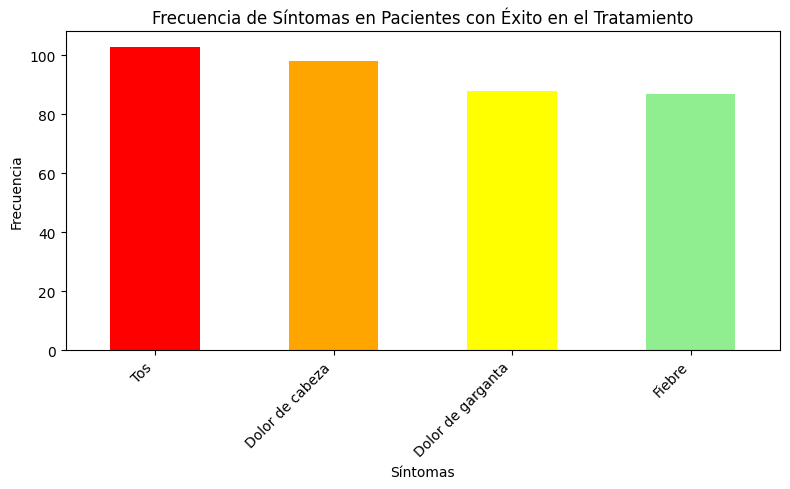

In [ ]:
# Filtrar pacientes con éxito en el tratamiento
exitosos = muestra_aleatoria[muestra_aleatoria['Tratamiento'] == 1]
No_exitosos = muestra_aleatoria[muestra_aleatoria['Tratamiento'] == 0]
# Calcular la frecuencia de los síntomas entre los pacientes exitosos
frecuencia_sintomas = exitosos['Sintoma_1'].value_counts()

colores = ['red', 'orange', 'yellow', 'lightgreen', 'lightpink']
etiquetas = ['Tos', 'Dolor de cabeza', 'Dolor de garganta', 'Fiebre']

# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
ax = frecuencia_sintomas.plot(kind='bar', color=colores)
plt.title('Frecuencia de Síntomas en Pacientes con Éxito en el Tratamiento')
plt.xlabel('Síntomas')
plt.ylabel('Frecuencia')

# Agregar etiquetas personalizadas
ax.set_xticklabels(etiquetas, rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(muestra_aleatoria["Riesgo"], muestra_aleatoria['IMC'])

# Realizar la prueba de chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Imprimir el resultado
print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

# Interpretar los resultados
alpha = 0.05  # Nivel de significancia
if p < alpha:
    print("Hay una relación significativa entre Tratamiento Riesgo y Síntoma_")
else:
    print("No hay evidencia de una relación significativa entre Riesgo y Síntoma_2")

Estadístico Chi-cuadrado: 750.0
Valor p: 0.48283101083461694
No hay evidencia de una relación significativa entre Riesgo y Síntoma_2


1    114
2     91
3     87
4     84
Name: Sintoma_2, dtype: int64


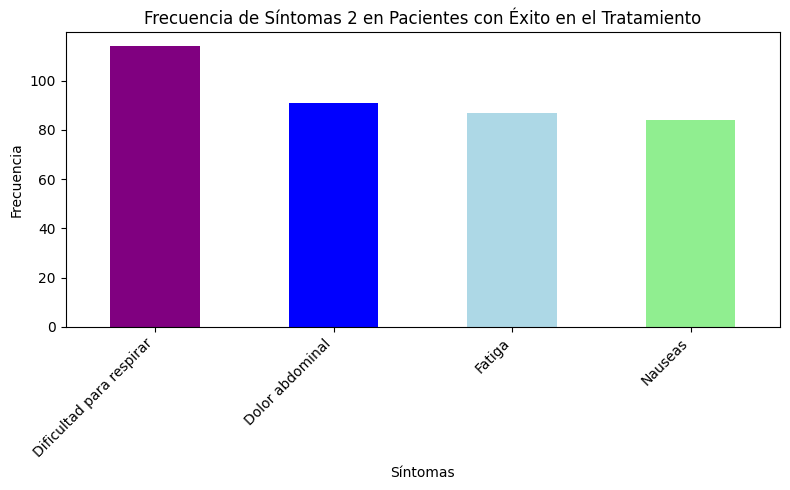

In [ ]:
# Filtrar pacientes con éxito en el tratamiento
exitosos = muestra_aleatoria[muestra_aleatoria['Tratamiento'] == 1]

# Calcular la frecuencia de los síntomas entre los pacientes exitosos
frecuencia_sintomas2 = exitosos['Sintoma_2'].value_counts()
print(frecuencia_sintomas2)
colores = ['purple', 'blue', 'lightblue', 'lightgreen', 'lightpink']
etiquetas = ['Dificultad para respirar', 'Dolor abdominal', 'Fatiga', 'Nauseas']

# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
ax = frecuencia_sintomas2.plot(kind='bar', color=colores)
plt.title('Frecuencia de Síntomas 2 en Pacientes con Éxito en el Tratamiento')
plt.xlabel('Síntomas')
plt.ylabel('Frecuencia')

# Agregar etiquetas personalizadas
ax.set_xticklabels(etiquetas, rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:

# Crear una tabla de contingencia entre "Diagnóstico de Cáncer" y "Síntoma"
contingency_table = pd.crosstab(muestra_aleatoria['Resultado_Prueba'],muestra_aleatoria['Presion_Arterial'])

# Realizar la prueba de chi-cuadrado para comparar proporciones
chi2, p, _, _ = chi2_contingency(contingency_table)

# Imprimir el resultado
print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

# Interpretar los resultados
alpha = 0.05  # Nivel de significancia
if p < alpha:
    print("Hay una relación significativa entre el diagnóstico de cáncer y el síntoma.")
else:
    print("No hay evidencia de una relación significativa entre el diagnóstico de cáncer y el síntoma.")

Estadístico Chi-cuadrado: 719.855090068525
Valor p: 0.5364941534371016
No hay evidencia de una relación significativa entre el diagnóstico de cáncer y el síntoma.


4    100
3     95
1     92
2     89
Name: Sintoma_3, dtype: int64


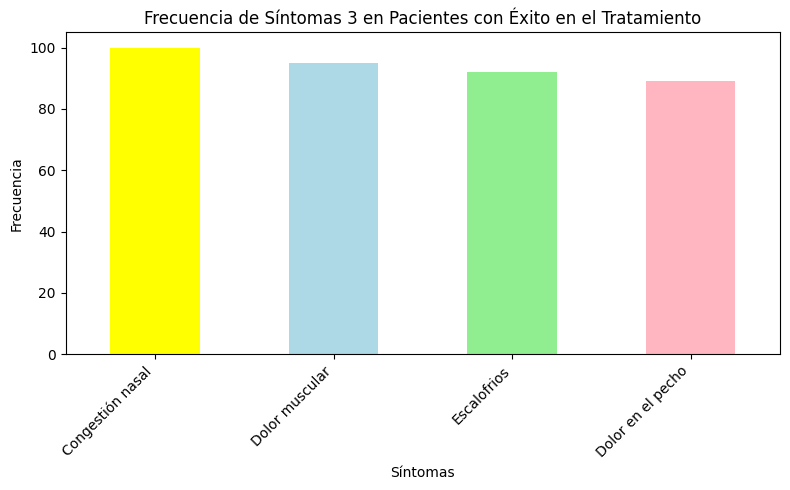

In [ ]:
# Filtrar pacientes con éxito en el tratamiento
exitosos = muestra_aleatoria[muestra_aleatoria['Tratamiento'] == 1]

# Calcular la frecuencia de los síntomas entre los pacientes exitosos
frecuencia_sintomas3 = exitosos['Sintoma_3'].value_counts()
print(frecuencia_sintomas3)
colores = ['yellow', 'lightblue', 'lightgreen', 'lightpink']
etiquetas = ['Congestión nasal', 'Dolor muscular', 'Escalofrios', 'Dolor en el pecho']

# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
ax = frecuencia_sintomas3.plot(kind='bar', color=colores)
plt.title('Frecuencia de Síntomas 3 en Pacientes con Éxito en el Tratamiento')
plt.xlabel('Síntomas')
plt.ylabel('Frecuencia')

# Agregar etiquetas personalizadas
ax.set_xticklabels(etiquetas, rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#¿Que variables clınicas estan mas fuertemente correlacionadas con la necesidad de intervenciones medicas urgentes?

In [ ]:
ef urgente(fila):
    if (
        fila['Nivel_Azucar'] >= 300 or
        fila['Presion_Arterial'] >= 180 or
        fila['Colesterol'] >= 240 or
        fila['Frecuencia_Cardiaca'] <= 60 or fila['Frecuencia_Cardiaca'] >= 100
    ):
        return 1
    else:
        return 0

muestra_aleatoria['Urgencia'] = muestra_aleatoria.apply(urgente, axis=1)


pacientes_con_urgencia = muestra_aleatoria[muestra_aleatoria['Urgencia'] == 1]
pacientes_con_urgencia = muestra_aleatoria[muestra_aleatoria['Urgencia'] == 0]

In [ ]:
from scipy.stats import pearsonr
corr1, _ = pearsonr(muestra_aleatoria['Nivel_Azucar'], muestra_aleatoria['Urgencia'])
print("Correlación de Pearson entre Nivel_Azúcar e Intervenciones_Urgentes:", corr1)
corr2, _ = pearsonr(muestra_aleatoria['Presion_Arterial'],muestra_aleatoria['Urgencia'])
print("Correlación de Pearson entre Presión_Arterial e Intervenciones_Urgentes:", corr2)
corr3, _ = pearsonr(muestra_aleatoria['Colesterol'], muestra_aleatoria['Urgencia'])
print("Correlación de Pearson entre Colesterol e Intervenciones_Urgentes:", corr3)
corr4, _ = pearsonr(muestra_aleatoria['Frecuencia_Cardiaca'],muestra_aleatoria['Urgencia'])
print("Correlación de Pearson entre Presión_Arterial e Intervenciones_Urgentes:", corr4)

#¿Cuál es la probabilidad de que un paciente con antecedentes familiares de la enfermedad desarrolle complicaciones graves?

In [ ]:
pacientes_con_antecedentes_positivos_y_complicaciones = muestra_aleatoria[(muestra_aleatoria['Antecedentes_Familiares'] == 1) & (muestra_aleatoria['Urgencia'] == 1)]
pacientes_con_antecedentes_positivos = muestra_aleatoria[muestra_aleatoria['Antecedentes_Familiares'] == 1]
print(len(pacientes_con_antecedentes_positivos_y_complicaciones), len(pacientes_con_antecedentes_positivos))
Probabilidad_Complicaciones_Pos = len(pacientes_con_antecedentes_positivos_y_complicaciones)/len(pacientes_con_antecedentes_positivos)
Probabilidad_Complicaciones_Pos

pacientes_con_antecedentes_negativa_y_complicaciones = muestra_aleatoria[(muestra_aleatoria['Antecedentes_Familiares'] == 0) & (muestra_aleatoria['Urgencia'] == 1)]
pacientes_con_antecedentes_negativa = muestra_aleatoria[muestra_aleatoria['Antecedentes_Familiares'] == 0]
print(len(pacientes_con_antecedentes_negativa_y_complicaciones), len(pacientes_con_antecedentes_negativa))
Probabilidad_Complicaciones_Neg = len(pacientes_con_antecedentes_negativa_y_complicaciones)/len(pacientes_con_antecedentes_negativa)
Probabilidad_Complicaciones_Neg

#¿Cuál es el impacto del género del paciente en la efectividad de los tratamientos médicos?

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
pacientes_hombres = muestra_aleatoria[muestra_aleatoria['Genero'] == 1]
pacientes_mujeres = muestra_aleatoria[muestra_aleatoria['Genero'] == 0]
tabla_contingencia = pd.crosstab(muestra_aleatoria['Tratamiento'], muestra_aleatoria['Genero'])
chi2, p_valor, _, _ = chi2_contingency(tabla_contingencia)
print("Estadística chi-cuadrado:", chi2)
print("Valor p:", p_valor)
if p_valor < 0.05:  # Nivel de significancia del 5%
    print("Hay una diferencia significativa en la efectividad del tratamiento entre hombres y mujeres.")
else:
    print("No se encontraron diferencias significativas en la efectividad del tratamiento entre hombres y mujeres.")

X = muestra_aleatoria['Genero']

X = sm.add_constant(X)


y = muestra_aleatoria['Tratamiento']

modelo = sm.Logit(y, X)
resultados = modelo.fit()
print(resultados.summary())

#¿Cuál es la relación entre la frecuencia cardiaca de un paciente y su puntuación en una prueba medica específica?

In [ ]:
muestra_aleatoria['const'] = 1

# Definir las variables independientes (X) y la variable dependiente (y)
X = muestra_aleatoria[['const', 'Presion_Arterial']]
y = muestra_aleatoria['Resultado_Prueba']

# Ajustar un modelo de regresión logística
model = sm.Logit(y, X).fit()

# Obtener los resultados del modelo
results = model.summary()

# Imprimir los resultados
print(results)

#¿Qué tipo de síntomas tienden a presentar los pacientes que tienen un resultado negativo en la prueba de diagnóstico?

In [ ]:
tabla_cruzada = pd.crosstab(muestra_aleatoria['Resultado_Prueba'], muestra_aleatoria['Sintoma_1'])
plt.figure(figsize=(6, 2))
sns.heatmap(tabla_cruzada, annot=True, fmt='d', cmap='Blues')

# Personaliza los ejes y el título
plt.xlabel('Síntoma_1')
plt.ylabel('Resultado_Prueba')
plt.title('Tabla Cruzada entre Resultado_Prueba y Síntoma_1')

# Muestra la visualización
plt.show()

In [ ]:
tabla_cruzada = pd.crosstab(muestra_aleatoria['Resultado_Prueba'], muestra_aleatoria['Sintoma_3'])
plt.figure(figsize=(6, 2))
sns.heatmap(tabla_cruzada, annot=True, fmt='d', cmap='viridis')
# Personaliza los ejes y el título
plt.xlabel('Síntoma_3')
plt.ylabel('Resultado_Prueba')
plt.title('Tabla Cruzada entre Resultado_Prueba y Síntoma_3')
# Muestra la visualización
plt.show()

In [ ]:
tabla_cruzada = pd.crosstab(muestra_aleatoria['Resultado_Prueba'], muestra_aleatoria['Sintoma_2'])
plt.figure(figsize=(6, 2))
sns.heatmap(tabla_cruzada, annot=True, fmt='d', cmap='inferno')
# Personaliza los ejes y el título
plt.xlabel('Síntoma_3')
plt.ylabel('Resultado_Prueba')
plt.title('Tabla Cruzada entre Resultado_Prueba y Síntoma_2')
# Muestra la visualización
plt.show()